In [2]:
import numpy as np
import seaborn as sn
import matplotlib as plt
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc,accuracy_score

2023-01-04 21:33:12.014025: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-04 21:33:12.014046: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = f"{path}/{expression}"
        print(dir_)
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/train'

In [16]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
print(test_generator)

Found 3736 images belonging to 7 classes.


In [21]:
predictions = emotion_model.predict_generator(test_generator)

UnimplementedError:  Fused conv implementation does not support grouped convolutions for now.
	 [[node sequential_1/conv2d_4/Relu (defined at tmp/ipykernel_40236/2654746365.py:1) ]] [Op:__inference_predict_function_1194]

Function call stack:
predict_function


[[ 52   6  31 146  74  30  92]
 [  3   0   1  15   5   4   6]
 [ 62   6  46 165  61  44  92]
 [171  11 147 488 203 121 214]
 [ 68   8  58 201  69  56  87]
 [ 22   3  21  76  26  20  38]
 [ 75   5  69 261 106  67 104]]


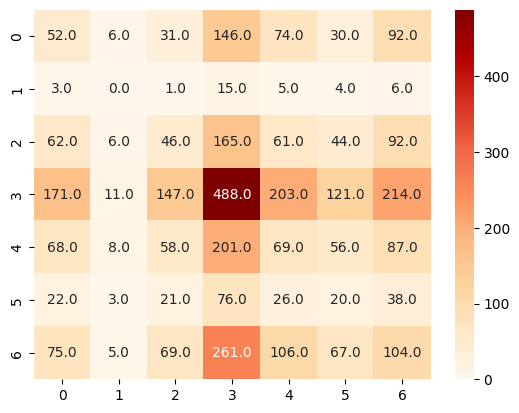

In [ ]:
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
sn.heatmap(c_matrix, annot=True,cmap="OrRd",fmt=".1f")
plt.show()

In [ ]:
# Classification report
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.11      0.12      0.12       431
           1       0.00      0.00      0.00        34
           2       0.12      0.10      0.11       476
           3       0.36      0.36      0.36      1355
           4       0.13      0.13      0.13       547
           5       0.06      0.10      0.07       206
           6       0.16      0.15      0.16       687

    accuracy                           0.21      3736
   macro avg       0.14      0.14      0.13      3736
weighted avg       0.21      0.21      0.21      3736



In [ ]:
#AccuraCY SCORE
accuracy_score(test_generator.classes, predictions.argmax(axis=1))

0.2085117773019272

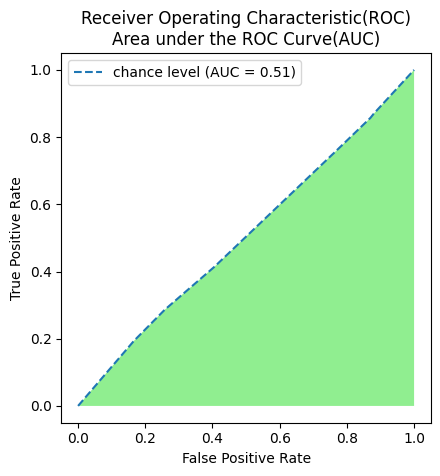

In [ ]:
#Receiver Operating Characteristic(ROC) And 
fpr, tpr, thresholds = roc_curve(np.array(test_generator.classes), np.array(predictions.argmax(axis=1)), pos_label=2)
auc_r = "{:.2f}".format(auc(fpr, tpr))
plt.plot(fpr,tpr, "--",label=f"chance level (AUC = {auc_r})")
plt.fill_between(fpr, tpr, facecolor='lightgreen')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)\nArea under the ROC Curve(AUC)")
plt.legend()
plt.show()
